In [3]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror

# RT

In [4]:
import pandas as pd
database_pre = pd.read_excel('database_TCC.xlsx')
database = database_pre[['A','E','N','Rt']]
database

,A,E,N,Rt
0,25,1,11,1.638
1,25,1,5,2.595
2,25,2,8,1.976
3,25,3,11,4.164
4,25,3,5,2.869
5,35,1,8,1.421
6,35,2,11,1.564
7,35,2,5,2.101
8,35,3,8,1.591
9,25,1,8,1.946


In [5]:
import pickle

with open("standard_scaler_Rt.pkl", "rb") as f:
    rawdata = f.read()

standard_scaler_rt = pickle.loads(rawdata)
data = standard_scaler_rt.transform(database)
database = pd.DataFrame(data,columns=database.columns)

### Random Forest Regressor

In [4]:
with open("Random_Forest_Regressor_Rt.pkl", "rb") as f:
    rawdata = f.read()
random_forest_regressor_rt = pickle.loads(rawdata)

In [5]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

random_forest_regressor_rt.score(test_x,test_y)

0.3306427822593704

In [6]:
random_forest_regressor_rt.feature_importances_

array([0.21042855, 0.33216308, 0.45740836])

In [7]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = random_forest_regressor_rt.predict(test_x)
desnormalizado_teste = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_teste

array([[25.       ,  1.       ,  8.       ,  1.9387754],
       [25.       ,  2.       ,  5.       ,  2.3872834],
       [35.       ,  3.       , 11.       ,  2.6087644]])

In [8]:
random_forest_regressor_result = desnormalizado_teste[:,-1]

In [9]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = test_y
desnormalizado_resultado = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.   ,  1.   ,  8.   ,  1.946],
       [25.   ,  2.   ,  5.   ,  2.991],
       [35.   ,  3.   , 11.   ,  2.896]])

### Support Vector Machine

In [10]:
with open("Support_Vector_Machine_Rt.pkl", "rb") as f:
    rawdata = f.read()
support_vector_machine_rt = pickle.loads(rawdata)

In [11]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

support_vector_machine_rt.score(test_x,test_y)

0.4359749662202925

In [12]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = support_vector_machine_rt.predict(test_x)
desnormalizado_teste = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_teste

array([[25.        ,  1.        ,  8.        ,  1.5461987 ],
       [25.        ,  2.        ,  5.        ,  2.5288563 ],
       [35.        ,  3.        , 11.        ,  2.83884896]])

In [13]:
support_vector_machine_result = desnormalizado_teste[:,-1]

In [14]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = test_y
desnormalizado_resultado = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.   ,  1.   ,  8.   ,  1.946],
       [25.   ,  2.   ,  5.   ,  2.991],
       [35.   ,  3.   , 11.   ,  2.896]])

### Keras

In [7]:
from keras.models import load_model
keras_rt = load_model('keras_model_Rt.h5')

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

In [8]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = keras_rt.predict(test_x.values)
desnormalizado_teste = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 95ms/step


array([[25.        ,  1.        ,  8.        ,  1.85900101],
       [25.        ,  2.        ,  5.        ,  2.70135503],
       [35.        ,  3.        , 11.        ,  2.44664487]])

In [9]:
keras_results = desnormalizado_teste[:,-1]

In [10]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = test_y
desnormalizado_resultado = standard_scaler_rt.inverse_transform(desnormalizar)
desnormalizado_resultado

answers = desnormalizado_resultado[:,-1]

In [11]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.5607051471657352 meansquarederror: 0.09779435582178791 meanabsoluteerror: 0.27533303105076423 maxerror: 0.4493551311139612


(0.5607051471657352,
 0.09779435582178791,
 0.27533303105076423,
 0.4493551311139612)

# RESULTS

In [20]:
df_results_rt = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Rt']])
df_results_rt['Random Forest Regressor'] = random_forest_regressor_result
df_results_rt['Support Vector Machine'] = support_vector_machine_result
df_results_rt['Keras'] = keras_results

In [21]:
df_results_rt

,A,E,N,Rt,Random Forest Regressor,Support Vector Machine,Keras
9,25,1,8,1.946,1.938775,1.546199,1.859001
10,25,2,5,2.991,2.387283,2.528856,2.701355
11,35,3,11,2.896,2.608764,2.838849,2.446645


In [22]:
df_results_rt['average'] = df_results_rt[['Random Forest Regressor','Support Vector Machine','Keras']].mean(axis=1)

In [23]:
df_results_rt

,A,E,N,Rt,Random Forest Regressor,Support Vector Machine,Keras,average
9,25,1,8,1.946,1.938775,1.546199,1.859001,1.781325
10,25,2,5,2.991,2.387283,2.528856,2.701355,2.539165
11,35,3,11,2.896,2.608764,2.838849,2.446645,2.631419


In [26]:
scores(df_results_rt['Rt'],df_results_rt['average'])

r2: 0.5488872053061085 meansquarederror: 0.1004252266454385 meanabsoluteerror: 0.2936968811521112 maxerror: 0.4518350886802507


(0.5488872053061085,
 0.1004252266454385,
 0.2936968811521112,
 0.4518350886802507)

In [30]:
df_delta_rt = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Rt']])
df_delta_rt['Random Forest Regressor'] = (abs((df_results_rt['Random Forest Regressor'] - df_results_rt['Rt'])/df_results_rt['Rt'])*100).round(2)
df_delta_rt['Support Vector Machine'] = (abs((df_results_rt['Support Vector Machine'] - df_results_rt['Rt'])/df_results_rt['Rt'])*100).round(2)
df_delta_rt['Keras'] = (abs((df_results_rt['Keras'] - df_results_rt['Rt'])/df_results_rt['Rt'])*100).round(2)
df_delta_rt['average'] = (abs((df_results_rt['average'] - df_results_rt['Rt'])/df_results_rt['Rt'])*100).round(2)

In [31]:
df_delta_rt[['Random Forest Regressor','Support Vector Machine','Keras','average']] = df_delta_rt[['Random Forest Regressor','Support Vector Machine','Keras','average']].applymap(lambda x: str(x) + '%')


In [32]:
df_delta_rt

,A,E,N,Rt,Random Forest Regressor,Support Vector Machine,Keras,average
9,25,1,8,1.946,0.37%,20.54%,4.47%,8.46%
10,25,2,5,2.991,20.18%,15.45%,9.68%,15.11%
11,35,3,11,2.896,9.92%,1.97%,15.52%,9.14%


# Graficos

In [12]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for N in [4,5,6,7,8,9,10,11]:
    # print(N)
    normalizado = standard_scaler_rt.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_rt.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_rt.inverse_transform(resultado_df)
    outcome = list(standard_scaler_rt.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 19ms/step
[[-0.84515425 -1.22474487 -1.63299316]] [[0.6562405]]
1/1 [==============================] - 0s 14ms/step
[[-0.84515425 -1.22474487 -1.22474487]] [[0.36345148]]
1/1 [==============================] - 0s 13ms/step
[[-0.84515425 -1.22474487 -0.81649658]] [[0.04440619]]
1/1 [==============================] - 0s 14ms/step


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[-0.84515425 -1.22474487 -0.40824829]] [[-0.2697221]]
1/1 [==============================] - 0s 13ms/step
[[-0.84515425 -1.22474487  0.        ]] [[-0.5840106]]
1/1 [==============================] - 0s 14ms/step
[[-0.84515425 -1.22474487  0.40824829]] [[-0.82169795]]
1/1 [==============================] - 0s 14ms/step
[[-0.84515425 -1.22474487  0.81649658]] [[-0.9060381]]
1/1 [==============================] - 0s 18ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[-0.86851025]]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,A,E,N,Nu
0,25.0,1.0,4.0,2.822441
1,25.0,1.0,5.0,2.594999
2,25.0,1.0,6.0,2.347162
3,25.0,1.0,7.0,2.103144
4,25.0,1.0,8.0,1.859001
5,25.0,1.0,9.0,1.674363
6,25.0,1.0,10.0,1.608847
7,25.0,1.0,11.0,1.637999


A: 25 E: 1 N: 11 Nu: 0


<AxesSubplot:xlabel='N', ylabel='Nu'>

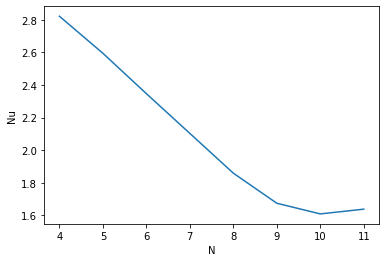

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print('A:',A,'E:',E,'N:',N,'Nu:',NU)
sns.lineplot(x="N", y='Nu',data=dataframe_output,ci=None)

In [14]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for E in [1,2,3]:
    # print(N)
    normalizado = standard_scaler_rt.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_rt.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_rt.inverse_transform(resultado_df)
    outcome = list(standard_scaler_rt.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 18ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[-0.86851025]]
1/1 [==============================] - 0s 19ms/step
[[-0.84515425  0.          1.22474487]] [[0.69603366]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425  1.22474487  1.22474487]] [[2.383251]]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,A,E,N,Nu
0,25.0,1.0,11.0,1.637999
1,25.0,2.0,11.0,2.853353
2,25.0,3.0,11.0,4.164000


A: 25 E: 3 N: 11 Nu: 0


<AxesSubplot:xlabel='E', ylabel='Nu'>

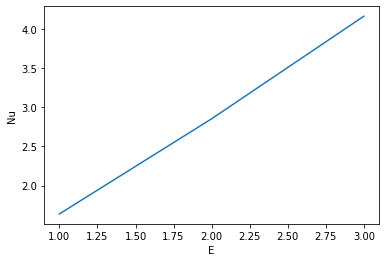

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print('A:',A,'E:',E,'N:',N,'Nu:',NU)
sns.lineplot(x="E", y='Nu',data=dataframe_output,ci=None)

In [17]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for A in [20,25,30,35,40]:
    # print(N)
    normalizado = standard_scaler_rt.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_rt.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_rt.inverse_transform(resultado_df)
    outcome = list(standard_scaler_rt.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 16ms/step
[[-1.85933936 -1.22474487  1.22474487]] [[-0.44240606]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[-0.86851025]]
1/1 [==============================] - 0s 21ms/step
[[ 0.16903085 -1.22474487  1.22474487]] [[-1.2982972]]
1/1 [==============================] - 0s 16ms/step


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[ 1.18321596 -1.22474487  1.22474487]] [[-1.610225]]
1/1 [==============================] - 0s 16ms/step
[[ 2.19740106 -1.22474487  1.22474487]] [[-1.9518977]]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,A,E,N,Nu
0,20.0,1.0,11.0,1.969001
1,25.0,1.0,11.0,1.637999
2,30.0,1.0,11.0,1.304136
3,35.0,1.0,11.0,1.061828
4,40.0,1.0,11.0,0.796413


A: 40 E: 1 N: 11 Nu: 0


<AxesSubplot:xlabel='A', ylabel='Nu'>

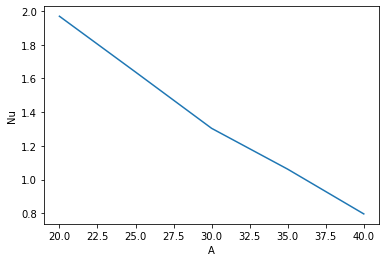

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print('A:',A,'E:',E,'N:',N,'Nu:',NU)
sns.lineplot(x="A", y='Nu',data=dataframe_output,ci=None)